In [493]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
from src.neil.dataset import prepare_dataset_for_training

In [494]:
idx = 3
sPathNumpy = f'/home/nsambhu/github/DualAttentionAttack/src/data/phy_attack/train/data{idx}.npz'
sPathMask = f'/home/nsambhu/github/DualAttentionAttack/src/data/masks/data{idx}.png'
sPathRendering = f'/home/nsambhu/data1/DAS_output/rendering/data{idx}.png'
sPathMash = f'/home/nsambhu/data1/DAS_output/mash/data{idx}.png'

In [495]:
result = np.load(sPathNumpy)['img']
mask = cv2.imread(sPathMask)
rendered = cv2.imread(sPathRendering)
mashed = cv2.imread(sPathMash)

In [496]:
def resize_numpy_to_tensor(image: np.ndarray, image_size: int):
    image = torch.from_numpy(image)
    image = T.functional.to_pil_image(image.permute((2,0,1)))
    image = T.functional.resize(image, (image_size, image_size))
    image = T.functional.to_tensor(image)
    return image.permute((1,2,0))

In [497]:
mask = resize_numpy_to_tensor(mask, result.shape[0])

In [498]:
result.shape, mask.shape, rendered.shape, mashed.shape

((800, 800, 3), torch.Size([800, 800, 3]), (800, 800, 3), (800, 800, 3))

In [499]:
type(result), type(mask), type(rendered), type(mashed)

(numpy.ndarray, torch.Tensor, numpy.ndarray, numpy.ndarray)

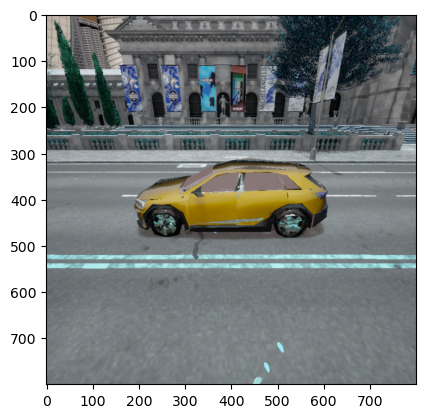

In [500]:
plt.imshow(result)

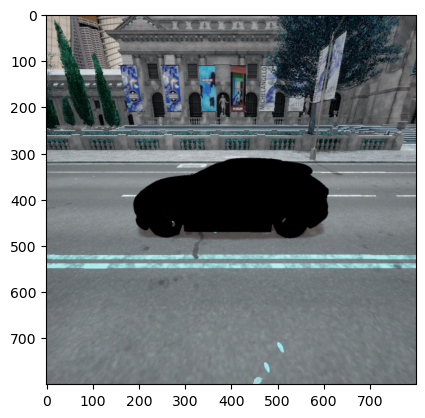

In [501]:
plt.imshow((torch.from_numpy(result)*(1-mask)).int())

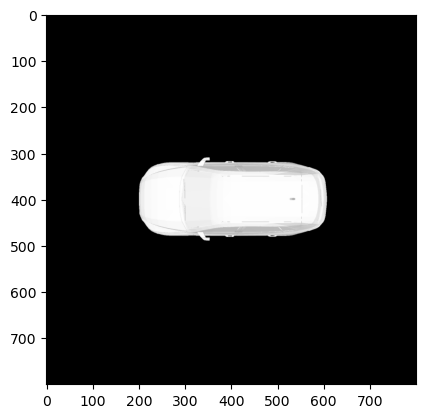

In [502]:
# plt.imshow((255*torch.from_numpy(rendered)*(mask)).int())
# plt.imshow(torch.from_numpy(rendered))
plt.imshow((torch.from_numpy(rendered)).int())



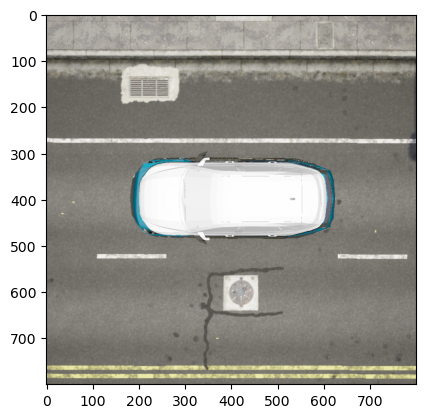

In [503]:
plt.imshow(mashed)

In [504]:
dataset = '/home/nsambhu/github/DualAttentionAttack/dataset/'
output = '/home/nsambhu/github/DualAttentionAttack/dataset/'
